## Importação de dados e bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv("../data/processed/participantes/participantesTotais.csv")

In [2]:
df.head()

,Participante,Data de nascimento,Ocupação,Origem,Posição,Signo,Estado,Região,Idade,Sexo,Sexualidade
0,Kleber de Paula Pedra,14/02/1978,Dançarino,"Campinas, São Paulo",1,aquario,São Paulo,Sudeste,23,0,0
1,Vanessa Melanie Pascale Ekypenyong Walborn,28/11/1974,Modelo,"Rio de Janeiro, Rio de Janeiro",2,sagitario,Rio de Janeiro,Sudeste,27,1,0
2,André Batista de Carvalho,28/11/1974,Professor de canto,"Rio de Janeiro, Rio de Janeiro",3,sagitario,Rio de Janeiro,Sudeste,27,0,1
3,Antonio Sergio Tavares Campo,06/12/1972,Cabeleireiro,Angola,4,sagitario,unknown,unknown,29,0,0
4,Alessandra Begliomini,05/12/1974,Empresária,"São Paulo, São Paulo",5,sagitario,São Paulo,Sudeste,27,1,0


## Tratamento dos dados e análises

In [3]:
df.isna().sum(axis = 0)

Participante          0
Data de nascimento    0
Ocupação              0
Origem                0
Posição               0
Signo                 0
Estado                0
Região                0
Idade                 0
Sexo                  0
Sexualidade           0
dtype: int64

### Quais regiões possuem mais participantes?

<AxesSubplot:xlabel='Região', ylabel='Count'>

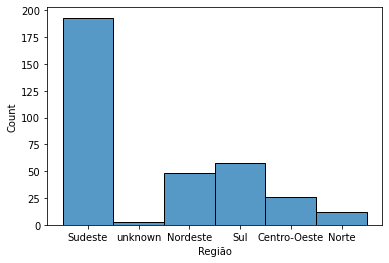

In [4]:
sns.histplot(df['Região'])

### Quais os signos mais comuns?

<AxesSubplot:xlabel='Signo', ylabel='Count'>

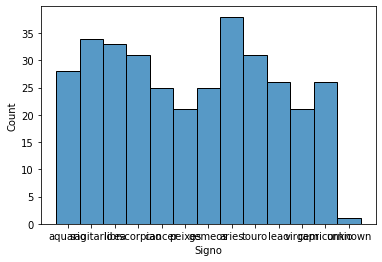

In [5]:
sns.histplot(df['Signo'])

<AxesSubplot:xlabel='Ocupação', ylabel='Count'>

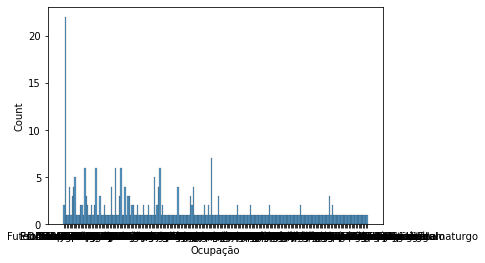

In [6]:
sns.histplot(df['Ocupação'])

<AxesSubplot:>

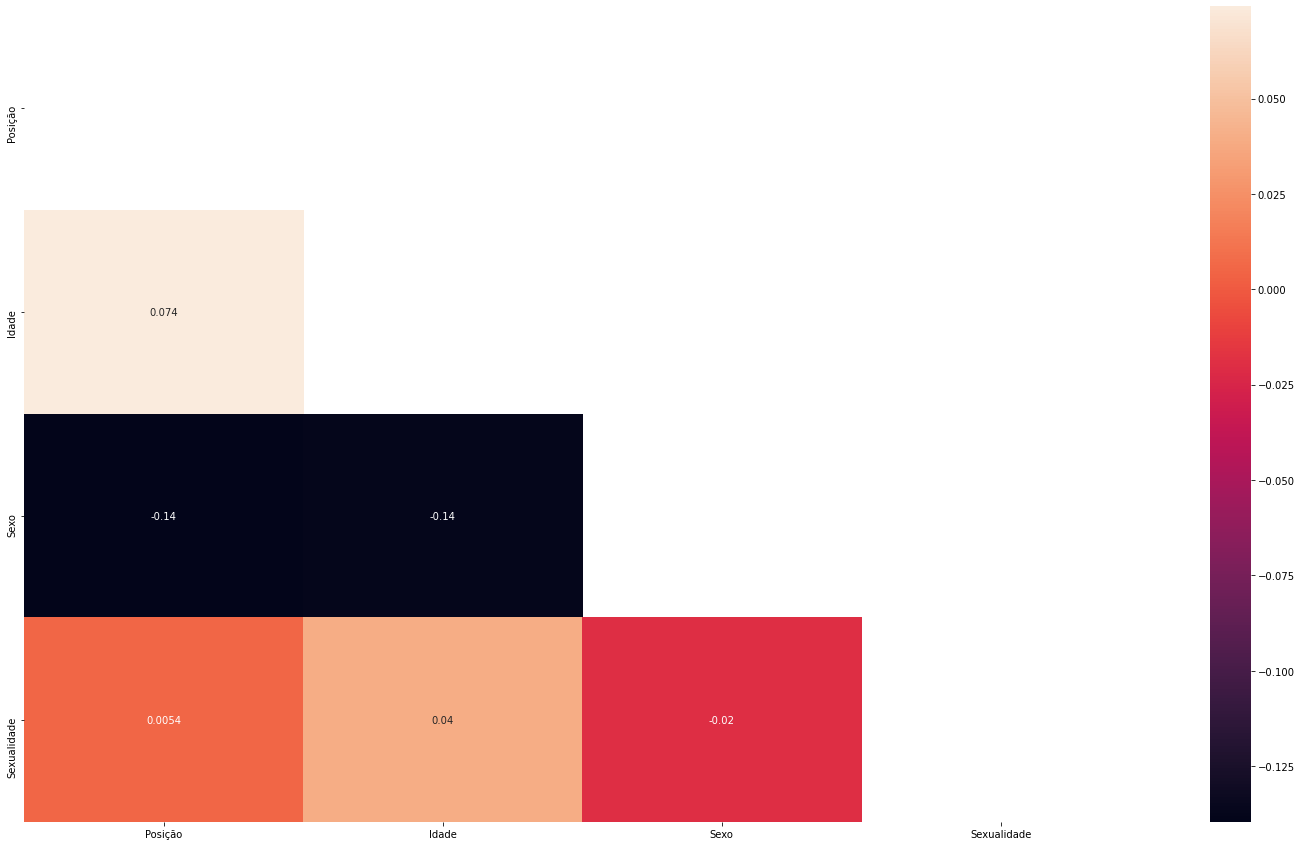

In [7]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot = True)

### Divisão em treino e validação

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(['Posição'],axis = 1)
y = df['Posição']

### Ordinal e One-Hot Encoder para variáveis categóricas

In [10]:
ordinal_columns = ['Signo','Estado']
one_hot_columns = ['Região']

In [11]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
print(X[ordinal_columns])
X[ordinal_columns] = ordinal_encoder.fit_transform(X[ordinal_columns])
print(X[ordinal_columns])

           Signo             Estado
0        aquario          São Paulo
1      sagitario     Rio de Janeiro
2      sagitario     Rio de Janeiro
3      sagitario            unknown
4      sagitario          São Paulo
..           ...                ...
335  capricornio             Paraná
336       gemeos  Rio Grande do Sul
337    sagitario     Espírito Santo
338    sagitario          São Paulo
339        touro              Ceará

[340 rows x 2 columns]
     Signo  Estado
0      0.0    24.0
1      9.0    20.0
2      9.0    20.0
3      9.0    25.0
4      9.0    24.0
..     ...     ...
335    3.0    13.0
336    5.0    19.0
337    9.0     8.0
338    9.0    24.0
339   10.0     6.0

[340 rows x 2 columns]


In [12]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse= False)
oh_cols = pd.DataFrame(one_hot_encoder.fit_transform(X[one_hot_columns]))
X = pd.concat([X, oh_cols], axis = 1)
print(X.head())

                                 Participante Data de nascimento  \
0                       Kleber de Paula Pedra         14/02/1978   
1  Vanessa Melanie Pascale Ekypenyong Walborn         28/11/1974   
2                   André Batista de Carvalho         28/11/1974   
3                Antonio Sergio Tavares Campo         06/12/1972   
4                       Alessandra Begliomini         05/12/1974   

             Ocupação                          Origem  Signo  Estado   Região  \
0           Dançarino             Campinas, São Paulo    0.0    24.0  Sudeste   
1              Modelo  Rio de Janeiro, Rio de Janeiro    9.0    20.0  Sudeste   
2  Professor de canto  Rio de Janeiro, Rio de Janeiro    9.0    20.0  Sudeste   
3        Cabeleireiro                          Angola    9.0    25.0  unknown   
4          Empresária            São Paulo, São Paulo    9.0    24.0  Sudeste   

   Idade  Sexo  Sexualidade    0    1    2    3    4    5  
0     23     0            0  0.0  0.0  0.0  

### Remover o restante das variáveis categóricas

In [13]:
X.drop(['Participante','Data de nascimento','Ocupação','Origem','Região'],axis=1, inplace = True)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [15]:
print(X_train)
print(y_train)

     Signo  Estado  Idade  Sexo  Sexualidade    0    1    2    3    4    5
66     2.0    20.0     47     1            0  0.0  0.0  0.0  1.0  0.0  0.0
114    9.0    20.0     31     0            0  0.0  0.0  0.0  1.0  0.0  0.0
7      2.0    13.0     25     1            0  0.0  0.0  0.0  0.0  1.0  0.0
137    2.0     4.0     26     1            0  0.0  1.0  0.0  0.0  0.0  0.0
328    3.0     9.0     32     0            0  1.0  0.0  0.0  0.0  0.0  0.0
..     ...     ...    ...   ...          ...  ...  ...  ...  ...  ...  ...
188    2.0    19.0     28     1            0  0.0  0.0  0.0  0.0  1.0  0.0
71    10.0    20.0     36     0            0  0.0  0.0  0.0  1.0  0.0  0.0
106    2.0    24.0     23     1            0  0.0  0.0  0.0  1.0  0.0  0.0
270    1.0     9.0     30     0            0  1.0  0.0  0.0  0.0  0.0  0.0
102    2.0    19.0     23     1            0  0.0  0.0  0.0  0.0  1.0  0.0

[272 rows x 11 columns]
66     14
114     1
7       8
137     6
328     9
       ..
188     4
71   

In [16]:
X['Idade'].value_counts()

27    35
28    34
26    33
25    25
29    21
24    20
23    19
30    17
31    17
22    16
32    13
33    11
35    10
21     9
41     8
36     8
34     7
20     5
38     5
39     4
40     3
19     3
37     3
47     2
54     2
64     2
42     1
44     1
51     1
53     1
57     1
62     1
65     1
71     1
Name: Idade, dtype: int64

## Aplicando a regressão Linear

In [17]:
from sklearn.linear_model import SGDRegressor

In [18]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_val = sc_x.transform(X_val)

In [19]:
mod = SGDRegressor()
mod.fit(X_train, y_train)

SGDRegressor()

In [20]:
y_pred = mod.predict(X_val)

In [21]:
print(y_val, y_pred)


284     2
116     3
113    14
42      4
126    13
       ..
173     5
208     7
72      5
75      8
16      5
Name: Posição, Length: 68, dtype: int64 [ 8.80082177  7.12229159  8.02971108  8.05366026  8.7768726   8.32714555
  7.97048156 10.53551213  8.72532526  8.61196176  8.74846094  9.51236031
  8.53501867  7.87852837  7.28288481  7.51603264  8.60161202  8.7012474
 12.60576469  9.2271578   7.25003986  8.00640532  8.11314715  7.59921134
 10.39991915  8.11314715  9.21544058  7.33641867  9.66392907  9.59259627
  7.30190556  7.61701767  7.13853153  8.8600513   8.8660138   7.92296925
  8.42217016  7.52314589  8.03278251  8.80769046  7.20252756 13.8037874
  8.01812254  9.28625864  9.25072092  7.17588561  7.16699663  7.68835047
  9.4291816   8.43440212  9.17977418  8.82570279  8.10117256  9.58036431
  9.50954625  8.94323679  9.62458374  8.18460864  6.46597401  8.70899727
  7.3974449   7.24587614 10.64380357  9.0178842   8.45907511  8.90058583
  7.65268407  9.69604523]


In [22]:
from sklearn.metrics import mean_absolute_error
erro = mean_absolute_error(y_val, y_pred)
print(erro)

4.217047323330067


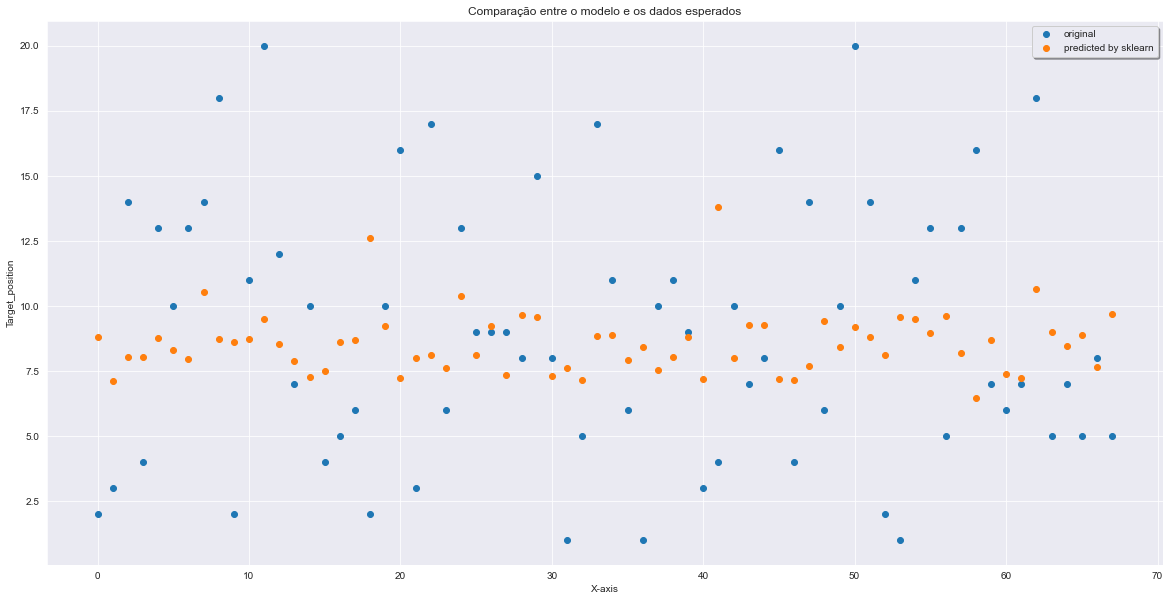

In [23]:
x_ax = range(len(y_val))
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.title("Comparação entre o modelo e os dados esperados")
plt.plot(x_ax, y_val, "o", label="original")
plt.plot(x_ax, y_pred, "o",label="predicted by sklearn")
plt.xlabel('X-axis')
plt.ylabel('Target_position')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Treinando todos os dados

In [24]:
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
mod = SGDRegressor()
mod.fit(X, y)

SGDRegressor()

In [25]:
X_test =pd.read_csv("../data/processed/participantes/teste.csv")

In [26]:
X_test

,Participante,Data de nascimento,Ocupação,Origem,Signo,Estado,Região,Idade,Sexo,Sexualidade
0,Arthur Queiroga Bandeira de Aguiar,03/03/1989,Ator e cantor,"Rio de Janeiro, Rio de Janeiro",peixes,Rio de Janeiro,Sudeste,33,0,0
1,Bárbara Heck,13/07/1992,Relações Públicas e modelo,"Novo Hamburgo, Rio Grande do Sul",cancer,Rio Grande do Sul,Sul,30,1,0
2,Bruna Gonçalves Coelho Oliveira (Brunna),16/12/1991,Bailarina e influenciadora digital,"Nilópolis, Rio de Janeiro",sagitario,Rio de Janeiro,Sudeste,31,1,1
3,Douglas Silva,27/09/1988,Ator,"Rio de Janeiro, Rio de Janeiro",libra,Rio de Janeiro,Sudeste,34,0,0
4,Eliezer do Carmo Neto,23/01/1990,Designer e empresário,"Volta Redonda, Rio de Janeiro",aquario,Rio de Janeiro,Sudeste,32,0,0
5,Eslovênia Marques de Lima,17/11/1996,Estudante de Marketing e modelo,"João Pessoa, Paraíba",escorpiao,Paraíba,Nordeste,26,1,0
6,Jade Picon Fróes,24/09/2001,Empresária e influenciadora digital,"São Paulo, São Paulo",libra,São Paulo,Sudeste,21,1,0
7,Jessilane Alves de Souza,28/11/1995,Bióloga e professora de Biologia,"Bom Jesus da Lapa, Bahia",sagitario,Bahia,Nordeste,27,1,0
8,Laís Rodrigues Caldas,18/11/1991,Médica,"Crixás, Goiás",escorpiao,Goiás,Centro-Oeste,31,1,0
9,Lina Pereira dos Santos (Linn da Quebrada),18/07/1990,Atriz e cantora,"São Paulo, São Paulo",cancer,São Paulo,Sudeste,32,1,1


In [27]:
oh_cols_test = pd.DataFrame(one_hot_encoder.transform(X_test[one_hot_columns]))
X_test = pd.concat([X_test, oh_cols_test], axis = 1)
X_test

,Participante,Data de nascimento,Ocupação,Origem,Signo,Estado,Região,Idade,Sexo,Sexualidade,0,1,2,3,4,5
0,Arthur Queiroga Bandeira de Aguiar,03/03/1989,Ator e cantor,"Rio de Janeiro, Rio de Janeiro",peixes,Rio de Janeiro,Sudeste,33,0,0,0.0,0.0,0.0,1.0,0.0,0.0
1,Bárbara Heck,13/07/1992,Relações Públicas e modelo,"Novo Hamburgo, Rio Grande do Sul",cancer,Rio Grande do Sul,Sul,30,1,0,0.0,0.0,0.0,0.0,1.0,0.0
2,Bruna Gonçalves Coelho Oliveira (Brunna),16/12/1991,Bailarina e influenciadora digital,"Nilópolis, Rio de Janeiro",sagitario,Rio de Janeiro,Sudeste,31,1,1,0.0,0.0,0.0,1.0,0.0,0.0
3,Douglas Silva,27/09/1988,Ator,"Rio de Janeiro, Rio de Janeiro",libra,Rio de Janeiro,Sudeste,34,0,0,0.0,0.0,0.0,1.0,0.0,0.0
4,Eliezer do Carmo Neto,23/01/1990,Designer e empresário,"Volta Redonda, Rio de Janeiro",aquario,Rio de Janeiro,Sudeste,32,0,0,0.0,0.0,0.0,1.0,0.0,0.0
5,Eslovênia Marques de Lima,17/11/1996,Estudante de Marketing e modelo,"João Pessoa, Paraíba",escorpiao,Paraíba,Nordeste,26,1,0,0.0,1.0,0.0,0.0,0.0,0.0
6,Jade Picon Fróes,24/09/2001,Empresária e influenciadora digital,"São Paulo, São Paulo",libra,São Paulo,Sudeste,21,1,0,0.0,0.0,0.0,1.0,0.0,0.0
7,Jessilane Alves de Souza,28/11/1995,Bióloga e professora de Biologia,"Bom Jesus da Lapa, Bahia",sagitario,Bahia,Nordeste,27,1,0,0.0,1.0,0.0,0.0,0.0,0.0
8,Laís Rodrigues Caldas,18/11/1991,Médica,"Crixás, Goiás",escorpiao,Goiás,Centro-Oeste,31,1,0,1.0,0.0,0.0,0.0,0.0,0.0
9,Lina Pereira dos Santos (Linn da Quebrada),18/07/1990,Atriz e cantora,"São Paulo, São Paulo",cancer,São Paulo,Sudeste,32,1,1,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
X_test[ordinal_columns] = ordinal_encoder.transform(X_test[ordinal_columns])

In [29]:
X_test

,Participante,Data de nascimento,Ocupação,Origem,Signo,Estado,Região,Idade,Sexo,Sexualidade,0,1,2,3,4,5
0,Arthur Queiroga Bandeira de Aguiar,03/03/1989,Ator e cantor,"Rio de Janeiro, Rio de Janeiro",8.0,20.0,Sudeste,33,0,0,0.0,0.0,0.0,1.0,0.0,0.0
1,Bárbara Heck,13/07/1992,Relações Públicas e modelo,"Novo Hamburgo, Rio Grande do Sul",2.0,19.0,Sul,30,1,0,0.0,0.0,0.0,0.0,1.0,0.0
2,Bruna Gonçalves Coelho Oliveira (Brunna),16/12/1991,Bailarina e influenciadora digital,"Nilópolis, Rio de Janeiro",9.0,20.0,Sudeste,31,1,1,0.0,0.0,0.0,1.0,0.0,0.0
3,Douglas Silva,27/09/1988,Ator,"Rio de Janeiro, Rio de Janeiro",7.0,20.0,Sudeste,34,0,0,0.0,0.0,0.0,1.0,0.0,0.0
4,Eliezer do Carmo Neto,23/01/1990,Designer e empresário,"Volta Redonda, Rio de Janeiro",0.0,20.0,Sudeste,32,0,0,0.0,0.0,0.0,1.0,0.0,0.0
5,Eslovênia Marques de Lima,17/11/1996,Estudante de Marketing e modelo,"João Pessoa, Paraíba",4.0,14.0,Nordeste,26,1,0,0.0,1.0,0.0,0.0,0.0,0.0
6,Jade Picon Fróes,24/09/2001,Empresária e influenciadora digital,"São Paulo, São Paulo",7.0,24.0,Sudeste,21,1,0,0.0,0.0,0.0,1.0,0.0,0.0
7,Jessilane Alves de Souza,28/11/1995,Bióloga e professora de Biologia,"Bom Jesus da Lapa, Bahia",9.0,4.0,Nordeste,27,1,0,0.0,1.0,0.0,0.0,0.0,0.0
8,Laís Rodrigues Caldas,18/11/1991,Médica,"Crixás, Goiás",4.0,9.0,Centro-Oeste,31,1,0,1.0,0.0,0.0,0.0,0.0,0.0
9,Lina Pereira dos Santos (Linn da Quebrada),18/07/1990,Atriz e cantora,"São Paulo, São Paulo",2.0,24.0,Sudeste,32,1,1,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
participantes = X_test['Participante']
X_test.drop(['Participante','Data de nascimento','Ocupação','Origem','Região'],axis=1, inplace = True)

In [31]:
X_test

,Signo,Estado,Idade,Sexo,Sexualidade,0,1,2,3,4,5
0,8.0,20.0,33,0,0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,19.0,30,1,0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.0,20.0,31,1,1,0.0,0.0,0.0,1.0,0.0,0.0
3,7.0,20.0,34,0,0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,20.0,32,0,0,0.0,0.0,0.0,1.0,0.0,0.0
5,4.0,14.0,26,1,0,0.0,1.0,0.0,0.0,0.0,0.0
6,7.0,24.0,21,1,0,0.0,0.0,0.0,1.0,0.0,0.0
7,9.0,4.0,27,1,0,0.0,1.0,0.0,0.0,0.0,0.0
8,4.0,9.0,31,1,0,1.0,0.0,0.0,0.0,0.0,0.0
9,2.0,24.0,32,1,1,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
X_test = sc_x.transform(X_test)

In [33]:
y_pred_test = mod.predict(X_test)

In [46]:
for i in range(20):
    print(participantes[i], y_pred_test[i])

Arthur Queiroga Bandeira de Aguiar 9.67246389264197
Bárbara Heck 7.291146776795847
Bruna Gonçalves Coelho Oliveira (Brunna) 7.953366461324466
Douglas Silva 9.694571828036292
Eliezer do Carmo Neto 9.5082774590761
Eslovênia Marques de Lima 9.388499325786091
Jade Picon Fróes 7.937740620451946
Jessilane Alves de Souza 9.0841371592086
Laís Rodrigues Caldas 7.739434284053482
Lina Pereira dos Santos (Linn da Quebrada) 8.049231038238892
Lucas Bissoli Garcia 9.160715536141074
Luciano Estevan Neto da Conceição 8.627991301974609
Vitória Nascimento Câmara (Maria) 7.501811046026154
Naiara de Fátima Azevedo 7.183689621511297
Natália Rocha de Oliveira Deodato 7.407062135552335
Paulo André Camilo de Oliveira 9.468316616628991
Pedro Henrique Mota Vianna (Pedro Scooby) 9.678785328239453
Rodrigo Abrão de Carvalho Mussi Ivo 10.055663272895103
Tiago Donato Abravanel Corte Gomes 9.674526033196969
Marcus Vinicius Fernandes de Sousa 10.118876495682924


In [47]:
classificacao = [x for _,x in sorted(zip(y_pred_test,participantes))]
for i in range(len(classificacao)):
    print((i+1), classificacao[i], y_pred_test[i])

1 Naiara de Fátima Azevedo 9.67246389264197
2 Bárbara Heck 7.291146776795847
3 Natália Rocha de Oliveira Deodato 7.953366461324466
4 Vitória Nascimento Câmara (Maria) 9.694571828036292
5 Laís Rodrigues Caldas 9.5082774590761
6 Jade Picon Fróes 9.388499325786091
7 Bruna Gonçalves Coelho Oliveira (Brunna) 7.937740620451946
8 Lina Pereira dos Santos (Linn da Quebrada) 9.0841371592086
9 Luciano Estevan Neto da Conceição 7.739434284053482
10 Jessilane Alves de Souza 8.049231038238892
11 Lucas Bissoli Garcia 9.160715536141074
12 Eslovênia Marques de Lima 8.627991301974609
13 Paulo André Camilo de Oliveira 7.501811046026154
14 Eliezer do Carmo Neto 7.183689621511297
15 Arthur Queiroga Bandeira de Aguiar 7.407062135552335
16 Tiago Donato Abravanel Corte Gomes 9.468316616628991
17 Pedro Henrique Mota Vianna (Pedro Scooby) 9.678785328239453
18 Douglas Silva 10.055663272895103
19 Rodrigo Abrão de Carvalho Mussi Ivo 9.674526033196969
20 Marcus Vinicius Fernandes de Sousa 10.118876495682924
